# Cat vs Dog Image Classifier
A CNN-based binary image classifier for distinguishing between cats and dogs.

## Requirements
- tensorflow
- numpy
- matplotlib

## Dataset Structure
Your folder should be organized as:
```
PetImages/
  Cats/
    1.jpg
    2.jpg
    ...
  Dogs/
    1.jpg
    2.jpg
    ...
```

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# ============================================================================
# Configuration
# ============================================================================

In [3]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 20
DATA_DIR = r'/Users/adityabawankule/Desktop/Projects/Image Classification/PetImages' 

# ============================================================================
# Data Augmentation & Preprocessing
# ============================================================================

In [4]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

In [5]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 19968 images belonging to 2 classes.


In [6]:
# Load validation data
validation_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 4991 images belonging to 2 classes.


# ============================================================================
# Build CNN Model
# ============================================================================

In [7]:
# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/Users/adityabawankule/Desktop/Projects/Image Classification/tfenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-25 11:00:17.649736: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-11-25 11:00:17.649905: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-25 11:00:17.649921: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-11-25 11:00:17.650098: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-25 11:00:17.650124: I tensorflow/core/common_runtime/plu

# ============================================================================
# Compile Model
# ============================================================================


In [8]:
# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/20


2025-11-25 11:01:49.434529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


192/624 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.5008 - loss: 0.6990

/Users/adityabawankule/Desktop/Projects/Image Classification/tfenv/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 ━━━━━━━━━━━━━━━━━━━━ 50s 75ms/step - accuracy: 0.5323 - loss: 0.6874 - val_accuracy: 0.5728 - val_loss: 0.6752
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.6006 - loss: 0.6694 - val_accuracy: 0.6494 - val_loss: 0.6367
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.6008 - loss: 0.6720 - val_accuracy: 0.5233 - val_loss: 0.7119
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.6334 - loss: 0.6581 - val_accuracy: 0.5304 - val_loss: 0.9144
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.6378 - loss: 0.7116 - val_accuracy: 0.5322 - val_loss: 1.4663
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.6151 - loss: 1.2661 - val_accuracy: 0.5927 - val_loss: 2.0414
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.6015 - loss: 2.6588 - val_accuracy: 0.6588 - val_loss: 0.9650
Epoch 8/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.5885 - loss: 10.0985 - val_accura

In [11]:
# Save model
model.save('cat_dog_classifier.h5')
print("\nModel saved as 'cat_dog_classifier.h5'")


Model saved as 'cat_dog_classifier.h5'


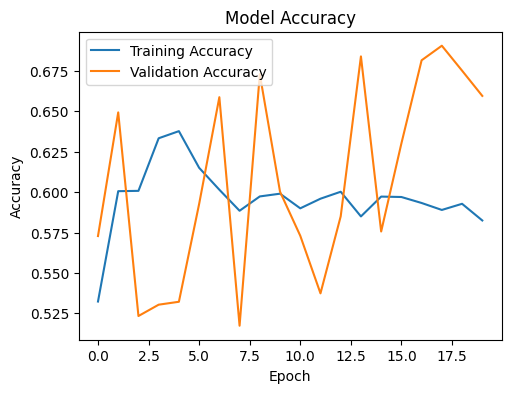

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

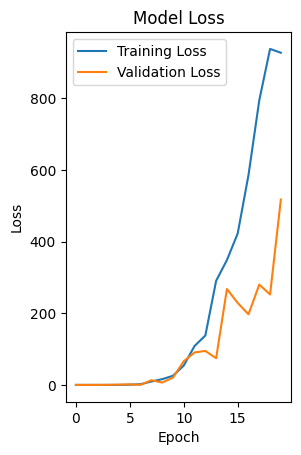

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [14]:
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
# Function to predict single image
def predict_image(img_path):
    img = keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    prediction = model.predict(img_array)[0][0]
    
    if prediction > 0.5:
        print(f"It's a DOG! (Confidence: {prediction*100:.2f}%)")
    else:
        print(f"It's a CAT! (Confidence: {(1-prediction)*100:.2f}%)")
    
    return prediction

In [19]:
predict_image(r'/Users/adityabawankule/Desktop/Projects/Image Classification/PetImages/Dog/22.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
It's a DOG! (Confidence: 100.00%)


1.0